# 1 - Data Cleaning / 27 11 2023

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("../raw_data/train.csv")


In [22]:
df[df["species"] == "Tundra Swan"]


,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
18822,4.0,no,tunswa,2 (stereo),2012-11-17,Not specified,14,XC112816.mp3,Not specified,Tundra Swan,...,112816,https://www.xeno-canto.org/112816,Poland,Marcin Sołowiej,Cygnus columbianus_Tundra Swan,15.208,Not specified,13:00,Marcin Sołowiej,Creative Commons Attribution-NonCommercial-Sha...
18823,4.0,NaN,tunswa,1 (mono),2007-03-06,level,4,XC11848.mp3,level,Tundra Swan,...,11848,https://www.xeno-canto.org/11848,United States,Allen T. Chartier,Cygnus columbianus_Tundra Swan,-83.2048,0-3(s),?,Allen T. Chartier,Creative Commons Attribution-NonCommercial-Sha...
18824,3.5,NaN,tunswa,1 (mono),2007-03-06,level,24,XC11849.mp3,level,Tundra Swan,...,11849,https://www.xeno-canto.org/11849,United States,Allen T. Chartier,Cygnus columbianus_Tundra Swan,-83.2048,0-3(s),?,Allen T. Chartier,Creative Commons Attribution-NonCommercial-Sha...
18825,3.5,NaN,tunswa,1 (mono),2007-03-06,level,19,XC11850.mp3,level,Tundra Swan,...,11850,https://www.xeno-canto.org/11850,United States,Allen T. Chartier,Cygnus columbianus_Tundra Swan,-83.2048,0-3(s),?,Allen T. Chartier,Creative Commons Attribution-NonCommercial-Sha...
18826,4.0,NaN,tunswa,1 (mono),2007-03-06,level,14,XC11851.mp3,level,Tundra Swan,...,11851,https://www.xeno-canto.org/11851,United States,Allen T. Chartier,Cygnus columbianus_Tundra Swan,-83.2048,0-3(s),?,Allen T. Chartier,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18881,5.0,no,tunswa,2 (stereo),2019-02-17,Not specified,26,XC457082.mp3,Not specified,Tundra Swan,...,457082,https://www.xeno-canto.org/457082,France,Stanislas Wroza,Cygnus columbianus_Tundra Swan,5.8143,Not specified,14:00,Stanislas Wroza,Creative Commons Attribution-NonCommercial-Sha...
18882,3.0,NaN,tunswa,2 (stereo),2019-02-21,Not specified,13,XC457590.mp3,Not specified,Tundra Swan,...,457590,https://www.xeno-canto.org/457590,Netherlands,Aat Schaftenaar,Cygnus columbianus_Tundra Swan,5.371,Not specified,01:00,Aat Schaftenaar,Creative Commons Attribution-NonCommercial-Sha...
18883,2.5,no,tunswa,2 (stereo),2019-04-12,Not specified,42,XC467768.mp3,Not specified,Tundra Swan,...,467768,https://www.xeno-canto.org/467768,United States,Bruce Lagerquist,Cygnus columbianus_Tundra Swan,-119.4536,Not specified,07:30,Bruce Lagerquist,Creative Commons Attribution-NonCommercial-Sha...
18884,0.0,NaN,tunswa,2 (stereo),2019-10-30,Not specified,29,XC505006.mp3,Not specified,Tundra Swan,...,505006,https://www.xeno-canto.org/505006,Netherlands,jaap oosterhuis,Cygnus columbianus_Tundra Swan,6.1046,Not specified,01:30,jaap oosterhuis,Creative Commons Attribution-NonCommercial-Sha...


In [3]:
species_fr = df[df["country"]== "France"]["species"].unique()


In [4]:
USEFUL_FEATS = ['filename','species', 'rating', 'channels', 'sampling_rate' , 'file_type']


In [5]:
df_fr = (df[df["species"].isin(species_fr)])[USEFUL_FEATS]
df_fr


,filename,species,rating,channels,sampling_rate,file_type
1337,XC138517.mp3,Sand Martin,4.0,1 (mono),44100 (Hz),mp3
1338,XC138873.mp3,Sand Martin,3.0,1 (mono),44100 (Hz),mp3
1339,XC139144.mp3,Sand Martin,3.0,1 (mono),44100 (Hz),mp3
1340,XC140280.mp3,Sand Martin,5.0,2 (stereo),44100 (Hz),mp3
1341,XC140282.mp3,Sand Martin,5.0,2 (stereo),44100 (Hz),mp3
...,...,...,...,...,...,...
18881,XC457082.mp3,Tundra Swan,5.0,2 (stereo),44100 (Hz),mp3
18882,XC457590.mp3,Tundra Swan,3.0,2 (stereo),48000 (Hz),mp3
18883,XC467768.mp3,Tundra Swan,2.5,2 (stereo),48000 (Hz),mp3
18884,XC505006.mp3,Tundra Swan,0.0,2 (stereo),44100 (Hz),wav


In [13]:
df_fr.shape


(2706, 6)

In [15]:
percentage =df_fr["species"].value_counts()/df_fr.shape[0] * 100
percentage


species
Sand Martin               3.695492
Eurasian Teal             3.695492
Snow Bunting              3.695492
Rock Dove                 3.695492
Red Crossbill             3.695492
Peregrine Falcon          3.695492
Western Osprey            3.695492
Mallard                   3.695492
House Sparrow             3.695492
Horned Lark               3.695492
Barn Swallow              3.695492
Great Egret               3.695492
European Herring Gull     3.695492
Gadwall                   3.695492
Eurasian Collared Dove    3.695492
Canada Goose              3.695492
Common Tern               3.695492
Common Redpoll            3.695492
Caspian Tern              3.695492
Northern Raven            3.695492
California Quail          3.325942
Common Loon               2.439024
Ring-billed Gull          2.439024
Pectoral Sandpiper        2.439024
Northern Shoveler         2.402069
Tundra Swan               2.365115
Merlin                    2.106430
Short-eared Owl           2.106430
Golden Eagle

# 1. Convert to pic

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


## 1.1 Mono - sans durée

In [60]:
filename_mono = 'XC138873.mp3'
y_mono, sr_mono= librosa.load(filename_mono, mono = True, sr = 48000)
sr_mono


48000

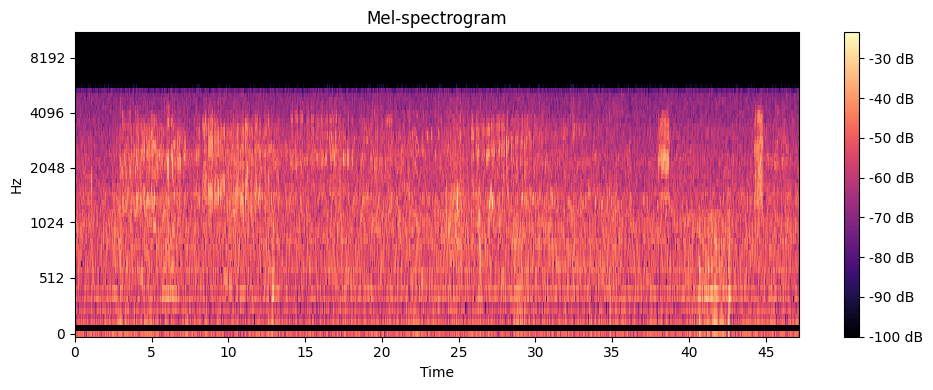

In [61]:
import numpy as np
# Compute the mel-spectrogram
#sample_rate = 48000 #window size of 10.7 ms (512 samples at 48 kHz)
n_fft = 512
f_min = 150 #frequency range between 150 et 15 kHz
f_max = 15000
hop_length = round(0.75*n_fft) #25 % de overlap, donc 0.75 * n_fft
n_mels = 64 #mel scale with 64 bands
htk = 1750 #break frequency

mel_spectrogram_mono = librosa.feature.melspectrogram(y = y_mono , sr=sr_mono, n_fft = n_fft, n_mels = n_mels, htk= htk, hop_length= hop_length, fmin = f_min, fmax= f_max)
mel_spectrogram_db_mono = librosa.power_to_db(mel_spectrogram_mono)
# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))

librosa.display.specshow(mel_spectrogram_db_mono, y_axis="mel", x_axis="time")
#librosa.display.specshow(mel_spectrogram)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-spectrogram")
plt.tight_layout()
plt.show()


In [62]:
mel_spectrogram_db_mono.shape


(64, 2032)

## 1.2 Stereo - sans durée

In [63]:
filename_stereo = 'XC457590.mp3'
y_stereo, sr_stereo= librosa.load(filename_stereo, sr = 48000)
sr_stereo


48000

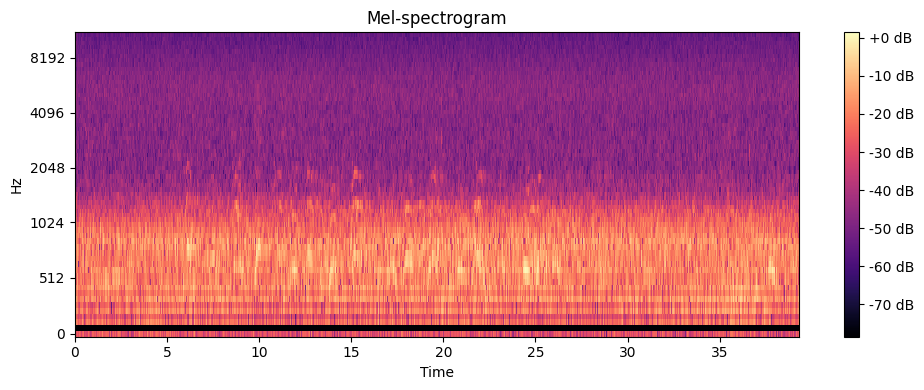

In [64]:
import numpy as np
# Compute the mel-spectrogram
#sample_rate = 48000 #window size of 10.7 ms (512 samples at 48 kHz)
n_fft = 512
f_min = 150 #frequency range between 150 et 15 kHz
f_max = 15000
hop_length = round(0.75*n_fft) #25 % de overlap, donc 0.75 * n_fft
n_mels = 64 #mel scale with 64 bands
htk = 1750 #break frequency

mel_spectrogram_stereo = librosa.feature.melspectrogram(y = y_stereo , sr=sr_stereo, n_fft = n_fft, n_mels = n_mels, htk= htk, hop_length= hop_length, fmin = f_min, fmax= f_max)
mel_spectrogram_db_stereo = librosa.power_to_db(mel_spectrogram_stereo)
# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))

librosa.display.specshow(mel_spectrogram_db_stereo, y_axis="mel", x_axis="time")
#librosa.display.specshow(mel_spectrogram)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-spectrogram")
plt.tight_layout()
plt.show()


In [66]:
mel_spectrogram_db_stereo.shape


(64, 1693)

## 1.3 Mono - avec durée

In [75]:
filename_mono = 'XC138873.mp3'
y_mono, sr_mono= librosa.load(filename_mono, mono = True, sr = 48000, duration = 3)
sr_mono


48000

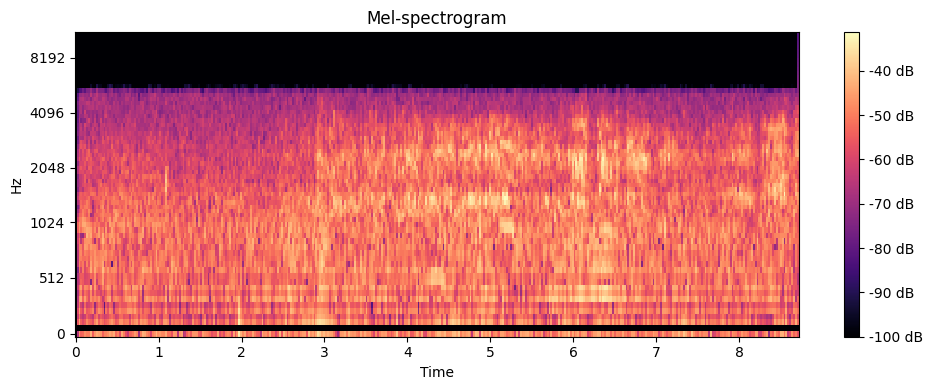

In [76]:
import numpy as np
# Compute the mel-spectrogram
#sample_rate = 48000 #window size of 10.7 ms (512 samples at 48 kHz)
n_fft = 512
f_min = 150 #frequency range between 150 et 15 kHz
f_max = 15000
hop_length = round(0.75*n_fft) #25 % de overlap, donc 0.75 * n_fft
n_mels = 64 #mel scale with 64 bands
htk = 1750 #break frequency

mel_spectrogram_mono = librosa.feature.melspectrogram(y = y_mono , sr=sr_mono, n_fft = n_fft, n_mels = n_mels, htk= htk, hop_length= hop_length, fmin = f_min, fmax= f_max)
mel_spectrogram_db_mono = librosa.power_to_db(mel_spectrogram_mono)
# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))

librosa.display.specshow(mel_spectrogram_db_mono, y_axis="mel", x_axis="time")
#librosa.display.specshow(mel_spectrogram)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-spectrogram")
plt.tight_layout()
plt.show()


In [77]:
mel_spectrogram_db_mono.shape


(64, 376)

## 1.2 Stereo - avec durée

In [72]:
filename_stereo = 'XC457590.mp3'
y_stereo, sr_stereo= librosa.load(filename_stereo, sr = 48000, duration = 3)
sr_stereo


48000

/home/mathieu/.pyenv/versions/3.10.6/envs/birdsong_classifier/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


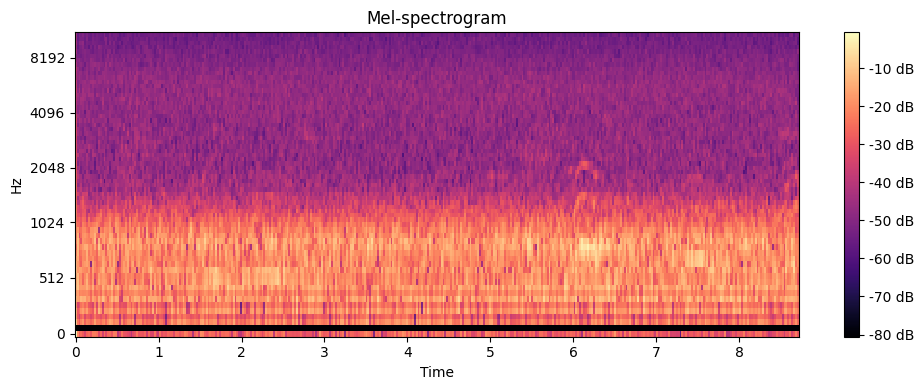

In [73]:
import numpy as np
# Compute the mel-spectrogram
#sample_rate = 48000 #window size of 10.7 ms (512 samples at 48 kHz)
n_fft = 512
f_min = 150 #frequency range between 150 et 15 kHz
f_max = 15000
hop_length = round(0.75*n_fft) #25 % de overlap, donc 0.75 * n_fft
n_mels = 64 #mel scale with 64 bands
htk = 1750 #break frequency

mel_spectrogram_stereo = librosa.feature.melspectrogram(y = y_stereo , sr=sr_stereo, n_fft = n_fft, n_mels = n_mels, htk= htk, hop_length= hop_length, fmin = f_min, fmax= f_max)
mel_spectrogram_db_stereo = librosa.power_to_db(mel_spectrogram_stereo)
# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))

librosa.display.specshow(mel_spectrogram_db_stereo, y_axis="mel", x_axis="time")
#librosa.display.specshow(mel_spectrogram)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-spectrogram")
plt.tight_layout()
plt.show()


In [74]:
mel_spectrogram_db_stereo.shape


(64, 376)